In [174]:
import requests
import base64
from stubhublogin import *
import pandas as pd
import pprint
import datetime
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
combo = consumer_key + ":" + consumer_secret
basic_authorization_token = base64.b64encode(combo.encode("utf-8"))

In [26]:
url = "https://api.stubhub.com/login"
headers = {
    "Content-Type": "application/x-www-form-urlencoded",
    "Authorization": "Basic " + basic_authorization_token.decode("utf-8"),
}

body = {
    "grant_type": "password",
    "username": login,
    "password": password,
    "scope": "PRODUCTION"
}

In [27]:
r = requests.post(url,headers=headers,data=body)

In [30]:
token_response = r.json()
access_token = token_response["access_token"]
user_GUID = r.headers["X-StubHub-User-GUID"]

In [31]:
inventory_url = "https://api.stubhub.com/search/inventory/v2"

In [32]:
headers["Authorization"] = "Bearer " + access_token
headers["Accept"] = "application/json"
headers["Accept-Encoding"] = "application/json"

In [69]:
event_id = "9833832"
data = {"eventid": event_id}

In [171]:
inventory = requests.get(inventory_url,headers=headers,params=data)
inv = inventory.json()

In [172]:
listing_df = pd.DataFrame(inv["listing"])
listing_df['listingPrice'] = listing_df.apply(lambda x: x['listingPrice']['amount'], axis=1)
listing_df['currentPrice'] = listing_df.apply(lambda x: x['currentPrice']['amount'], axis=1)

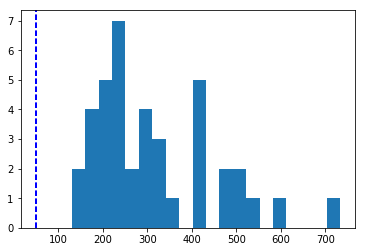

In [176]:
# listingPrice - price they sell for
# currentPrice - price with fees
# finalPrice - currentPrice * 1.03

In [163]:
from imp import reload
import find_tm
reload(find_tm)
from find_tm import find_event_id, find_price_ranges

In [181]:
events = find_tm.find_price_ranges({"keyword":"seinfeld beacon"})

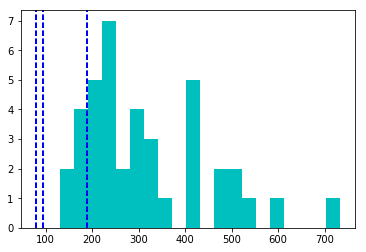

In [183]:
plt.hist(listing_df.currentPrice, bins=20, color='c', )

event = events[0]
for price in event["price"]:
    plt.axvline(float(price), color='b', linestyle='dashed', linewidth=2)

In [124]:
event.keys()

dict_keys(['_embedded', 'page', '_links'])